In [1]:
import pandas as pd
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

In [2]:
# Import logs from experiment
logs = pd.read_csv('Experimental_logs.csv')
logs

,id,user_token,first_name,created_at,created_at.1,total_time,id.1,path
0,1,NaN,djordan,2021-05-19 15:42:59,2021-05-19 15:42:59,00:00:18,4,3_SS_glaciers_melting_faster_than_ever.pdf
1,1,NaN,djordan,2021-05-19 15:43:05,2021-05-19 15:43:05,00:00:03,24,31Cows-and-Climate-Introduction.mp4
2,1,NaN,djordan,2021-05-24 13:49:57,2021-05-24 13:49:57,00:24:25,7,5-Eating-less-Meat-wont-save-the-Planet-Heres-...
3,1,NaN,djordan,2021-05-27 17:27:38,2021-05-27 17:27:38,00:03:34,34,40-Population-growth-and-climate-change-explai...
4,1,NaN,djordan,2021-05-27 17:58:10,2021-05-27 17:58:10,00:30:18,28,living-planet-unexpected-ideas.mp3
...,...,...,...,...,...,...,...,...
274,28,4101.0,Joost,2021-06-18 00:36:24,2021-06-18 00:36:24,00:00:07,65,19_MS_COVID-Related_Emissions_Affect_the_Clima...
275,28,4101.0,Joost,2021-06-18 00:44:30,2021-06-18 00:44:30,00:07:57,129,23-Conversation-with-global-warming-skeptic-An...
276,28,4101.0,Joost,2021-06-18 00:50:34,2021-06-18 00:50:34,00:05:46,132,45_CC_Glacial_CO2.pdf
277,28,4101.0,Joost,2021-06-18 00:53:45,2021-06-18 00:53:45,00:02:55,111,17-Why-renewables-cant-save-the-planet-Michael...


In [4]:
# Import source information
xls = pd.ExcelFile('Experiment sources.xlsx')
files = pd.read_excel(xls, 'Jasper (sorted)')

# Calculate new variables
files['id'] = files.index
files['x-axis'] = (files['id'] % 15) + 1
files['y-axis'] = np.ceil((files['id'] + 1) / 15)
files['Form Complexity'] = files['Form Complexity'].map(lambda x: 1 if x == 'Simple' else (2 if x == 'Medium' else 3))
files['Content Complexity'] = files['Content Complexity'].map(lambda x: 1 if x == 'Simple' else (2 if x == 'Medium' else 3))
files['Complexity'] = files['Form Complexity'] + files['Content Complexity'] - 1
files['Complexity_level'] = files['Complexity'].map(lambda x: 'high complexity' if x > 3 else 'lower complexity')
files['media_code'] = files['type'].map(lambda x: 'tab:red' if x == 'text' else ('tab:blue' if x == 'video' else 'tab:green'))

In [5]:
# Import user information from qualtrics
user_information = pd.read_excel('Survey_Data.xlsx').fillna('empty')


user_information['Pre_VC_1'] = user_information['Pre_VC_1'].map(lambda x: 1 if x == 'Cannot say' else 0)
user_information['Pre_VC_2'] = user_information['Pre_VC_2'].map(lambda x: 1 if x == 'True' else 0)
user_information['Pre_VC_3'] = user_information['Pre_VC_3'].map(lambda x: 1 if x == 'False' else 0)
user_information['Pre_VC_4'] = user_information['Pre_VC_4'].map(lambda x: 1 if x == 'False' else 0)
user_information['Pre_VC_5'] = user_information['Pre_VC_5'].map(lambda x: 1 if x == 'Cannot say' else 0)
user_information['Pre_VC_6'] = user_information['Pre_VC_6'].map(lambda x: 1 if x == 'False' else 0)
user_information['Pre_VC_score'] = user_information['Pre_VC_1'] + user_information['Pre_VC_2'] + user_information['Pre_VC_3'] + user_information['Pre_VC_4'] + user_information['Pre_VC_5'] + user_information['Pre_VC_6']

user_information['Pre_KL_1'] = user_information['Pre_KL_1'].map(lambda x: 1 if x.startswith('Greenhouse gases absorb') else 0)
user_information['Pre_KL_2'] = user_information['Pre_KL_2'].map(lambda x: 1 if x.startswith('Air temperature change over the past million years is mostly due') else 0)
user_information['Pre_KL_3'] = user_information['Pre_KL_3'].map(lambda x: 1 if x.startswith('Less sunlight will be reflected back into space and Earth’s temperature will increase') else 0)
user_information['Pre_KL_4'] = user_information['Pre_KL_4'].map(lambda x: 1 if x.startswith('The amount of carbon dioxide has increased') else 0)
user_information['Pre_KL_5'] = user_information['Pre_KL_5'].map(lambda x: 1 if x.startswith('Climate changes over long ') else 0)
user_information['Pre_KL_score'] = user_information['Pre_KL_1'] + user_information['Pre_KL_2'] + user_information['Pre_KL_3'] + user_information['Pre_KL_4'] + user_information['Pre_KL_5']

user_information['Post_VC_1'] = user_information['Post_VC_1'].map(lambda x: 1 if x == 'False' else 0)
user_information['Post_VC_2'] = user_information['Post_VC_2'].map(lambda x: 1 if x == 'Cannot say' else 0)
user_information['Post_VC_3'] = user_information['Post_VC_3'].map(lambda x: 1 if x == 'True' else 0)
user_information['Post_VC_4'] = user_information['Post_VC_4'].map(lambda x: 1 if x == 'Cannot say' else 0)
user_information['Post_VC_5'] = user_information['Post_VC_5'].map(lambda x: 1 if x == 'True' else 0)
user_information['Post_VC_6'] = user_information['Post_VC_6'].map(lambda x: 1 if x == 'True' else 0)
user_information['Post_VC_score'] = user_information['Post_VC_1'] + user_information['Post_VC_2'] + user_information['Post_VC_3'] + user_information['Post_VC_4'] + user_information['Post_VC_5'] + user_information['Post_VC_6']


user_information['Post_KL_1'] = user_information['Post_KL_1'].map(lambda x: 1 if x.startswith('Climate changes over long ') else 0)
user_information['Post_KL_2'] = user_information['Post_KL_2'].map(lambda x: 1 if x.startswith('Air temperature change over the past million years is mostly due') else 0)
user_information['Post_KL_3'] = user_information['Post_KL_3'].map(lambda x: 1 if x.startswith('Greenhouse gases absorb') else 0)
user_information['Post_KL_4'] = user_information['Post_KL_4'].map(lambda x: 1 if x.startswith('Less sunlight will be reflected back into space and Earth’s temperature will increase') else 0)
user_information['Post_KL_5'] = user_information['Post_KL_5'].map(lambda x: 1 if x.startswith('The amount of carbon dioxide has increased') else 0)
user_information['Post_KL_score'] = user_information['Post_KL_1'] + user_information['Post_KL_2'] + user_information['Post_KL_3'] + user_information['Post_KL_4'] + user_information['Post_KL_5']

users_info = user_information[['ID', 'UniqueID', 'Gender', 'Age', 'Education', 'NRB_5', 'Pre_VC_score', 'Pre_KL_score', 'Post_VC_score', 'Post_KL_score']].drop([0])

In [6]:
users_info

,ID,UniqueID,Gender,Age,Education,NRB_5,Pre_VC_score,Pre_KL_score,Post_VC_score,Post_KL_score
1,1,4567,Male,24,Master (MSc),Textual,3,3,3,3
2,2,7196,Male,23,Bachelor's degree (BSc),Visual,5,4,4,4
3,3,5697,Female,58,High school or equivalent,Visual,3,2,3,3
4,4,7360,Male,23,Master (MSc),Visual,3,4,4,4
5,5,5719,Female,57,High school or equivalent,Textual,3,3,2,4
6,6,289,Female,23,Bachelor's degree (BSc),Visual,1,2,3,3
7,7,8888,Female,23,Master (MSc),Textual,5,4,4,5
8,8,1511,Male,70,High school or equivalent,Textual,2,3,2,3
9,9,7777,Male,22,Bachelor's degree (BSc),Textual,0,2,3,5
10,10,3333,Male,23,Bachelor's degree (BSc),Textual,4,5,5,5


In [7]:
# Merge logs with source information
merged = logs.merge(files, left_on='path', right_on='file_name (eg. /file.mp4)')
merged = merged.sort_values(by = ['id_x', 'created_at']).dropna()
merged['user_token'] = merged['user_token'].astype(int).astype(str)
merged['total_time'] = pd.to_timedelta(merged['total_time']) 
merged['total_minutes'] = merged['total_time'] / np.timedelta64(1, 'm')


In [8]:
merged = users_info.merge(merged, left_on='UniqueID', right_on='user_token')
merged['agegroup'] = merged['Age'].map(lambda x: 'younger' if x < 30 else 'older')


In [9]:
merged.groupby('ID_x')['total_minutes'].sum()

ID_x
1.0      85.516667
2.0      78.850000
3.0      40.950000
4.0      40.483333
5.0      52.516667
6.0      50.933333
7.0      31.883333
8.0      75.400000
9.0      45.183333
10.0     38.633333
11.0     57.016667
12.0     39.583333
13.0     72.866667
14.0      9.083333
15.0    102.933333
16.0     21.950000
17.0    251.050000
18.0     57.716667
19.0     16.216667
20.0     91.233333
Name: total_minutes, dtype: float64

#### Education level

In [10]:
merged.groupby('Education')['total_minutes'].sum()

Education
Bachelor's degree (BSc)      646.550000
High school or equivalent    358.266667
Master (MSc)                 255.183333
Name: total_minutes, dtype: float64

In [11]:
# Percentage time in high 

# Highschool
print(18.133333 / 358.266667 * 100)

# Bachelor
print(160.333333 / 646.550000 * 100)

# Master
print(94.433333 / 255.183333 * 100)

5.061406675603456
24.79828829943547
37.006073982112305


In [13]:
merged.groupby(['Education','Complexity_level'])['total_minutes'].sum()

Education                  Complexity_level
Bachelor's degree (BSc)    high complexity     160.333333
                           lower complexity    486.216667
High school or equivalent  high complexity      18.133333
                           lower complexity    340.133333
Master (MSc)               high complexity      94.433333
                           lower complexity    160.750000
Name: total_minutes, dtype: float64

In [14]:
merged.groupby(['Education','Complexity_level'])['total_minutes'].mean()

Education                  Complexity_level
Bachelor's degree (BSc)    high complexity     7.287879
                           lower complexity    4.675160
High school or equivalent  high complexity     3.022222
                           lower complexity    6.073810
Master (MSc)               high complexity     7.264103
                           lower complexity    6.182692
Name: total_minutes, dtype: float64

## Age

In [15]:
# Video

#older
print (((7/12 + 4/4 + 8/10 + 7/8 + 3/6 + 30/55 + 3/7 + 7/13) * 100) / 8)

#younger
print((6/8 + 10/18 + 2/5 + 2/4 + 5/12 + 8/13 + 2/3 + 4/7 + 2/4 + 6/11 + 0 + 3/8) * 100 / 12)

65.88526057276059
49.134638509638506


In [16]:
# Audio

#older
print((2/12 + 0 + 1/10 + 0 + 1/6 + 9/55 + 2/7 + 1/13) * 100 / 8)

#younger
print((0 + 3/18 + 0 + 0 + 2/12 + 2/13 + 0 + 0 + 2/4 + 1/11 + 1/19 + 1/8) * 100 / 12)

11.995088245088246
10.46433464196622


In [17]:
#Text

#older
print(((3/12 + 0 + 1/10 + 1/8 + 2/6 + 16/55 + 2/7 + 5/13) * 100) / 8)

#younger
print((2/8 + 5/18 + 3/5 + 2/4 + 5/12 + 3/13 + 1/3 + 3/7 + 0 + 4/11 + 18/19 + 4/8) * 100 / 12)

22.11965118215118
40.40102684839527


In [18]:
merged.groupby(['agegroup', 'ID_x', 'type'])['UniqueID'].count()

agegroup  ID_x  type 
older     3.0   audio     2
                text      3
                video     7
          5.0   video     4
          8.0   audio     1
                text      1
                video     8
          11.0  text      1
                video     7
          16.0  audio     1
                text      2
                video     3
          17.0  audio     9
                text     16
                video    30
          18.0  audio     2
                text      2
                video     3
          20.0  audio     1
                text      5
                video     7
younger   1.0   text      2
                video     6
          2.0   audio     3
                text      5
                video    10
          4.0   text      3
                video     2
          6.0   text      2
                video     2
          7.0   audio     2
                text      5
                video     5
          9.0   audio     2
                text      

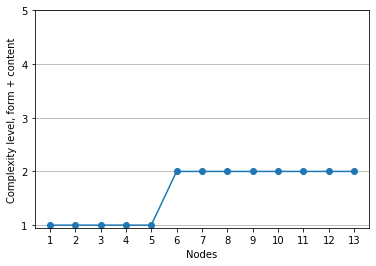

In [19]:
part = merged.loc[merged['ID_x'] == 20]
part_path = part.sort_values(by = 'created_at')[['x-axis', 'y-axis', 'type', 'total_time', 'Complexity', 'media_code' ]]
part_path['coordinates'] = list(zip(part_path['x-axis'], part_path['y-axis']))
complexity = part_path['Complexity'].tolist()
coorlist = part_path['coordinates'].tolist()
typelist = part_path['media_code'].tolist()

part_path['total_time'] = pd.to_timedelta(part_path['total_time']) 
s = pd.cut(part_path.total_time, pd.to_timedelta(['00:00:00','00:00:15','00:05:00','03:00:00']),
          labels=[0.7,2,3.3]).astype(float)
part_path['time_label'] = s

gender = part['Gender'].values[0]
age = part['Age'].values[0]
education = part['Education'].values[0]
pre_vc = part['Pre_VC_score'].values[0]
pre_kl = part['Pre_KL_score'].values[0]

pos = {v + 1: k for v, k in enumerate(coorlist)}
nodes = list(pos.keys())
edges = [(i, i+1) for i in nodes[:-1]]

plt.plot(nodes,complexity, marker = 'o')

plt.xlabel('Nodes')
plt.ylabel('Complexity level, form + content')
plt.xticks(range(1,len(nodes) +1))
plt.yticks(range(1,6))
plt.grid(True, axis = 'y')
#plt.title('Path - ' + gender + ', ' + str(age) + ' years old, ' + education + '. ' + str(pre_vc) + '/6 Verbal Reasoning, ' + str(pre_kl) + '/5 Knowledge' )
plt.show()





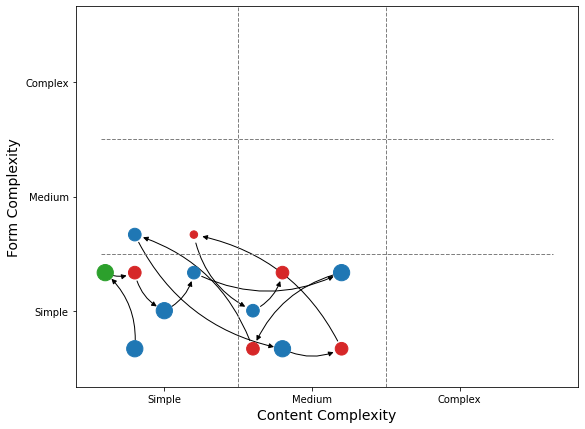

In [20]:


pos = {v + 1: k for v, k in enumerate(coorlist)}
nodes = list(pos.keys())
edges = [(i, i+1) for i in nodes[:-1]]

X=nx.DiGraph()
X.add_nodes_from(nodes)
X.add_edges_from(edges)

carac = pd.DataFrame({ 'ID':nodes, 'myvalue':typelist })
carac= carac.set_index('ID')
carac=carac.reindex(X.nodes())


carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes


fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(9)

nx.draw_networkx_nodes(G = X, pos=pos ,node_size= [i * 80 for i in s.to_list()],node_color=typelist, ax=ax)
nx.draw_networkx_edges(G=X, pos=pos, connectionstyle="arc3,rad=0.25")

ax.axhline(3.5, linestyle='--', color='gray', linewidth=1,xmin=0.05, xmax=0.95)
ax.axhline(6.5, linestyle='--', color='gray', linewidth=1,xmin=0.05, xmax=0.95) 
#ax.axhline(9.5, linestyle='--', color='gray', linewidth=1,xmin=0.05, xmax=0.95) 
ax.axvline(5.5, linestyle='--', color='gray', linewidth=1) #
ax.axvline(10.5, linestyle='--', color='gray', linewidth=1) #

ax.set_yticks([2, 5, 8])
ax.set_yticklabels(['Simple', 'Medium', 'Complex'])
ax.set_xticks([3, 8, 13])
ax.set_xticklabels(['Simple', 'Medium', 'Complex'])

axes = plt.gca()
axes.set_xlim([0,17])
axes.set_ylim([0,10])

#plt.title('Path - ' + gender + ', ' + str(age) + ' years old, ' + education + '. ' + str(pre_vc) + '/6 Verbal Reasoning, ' + str(pre_kl) + '/5 Knowledge' )

plt.xlabel('Content Complexity', fontsize=14)
plt.ylabel('Form Complexity', fontsize=14)

ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)